In [1]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sb

SchoolProfile_filename = '../../SchoolData/data_2014_school_profile.csv'
data = pd.read_csv(SchoolProfile_filename)

SchoolGrad_Absences_filename = '../../SchoolData/data_2014_School-Attendance-and-Graduation.csv'
SchoolGrad_Absences_data = pd.read_csv(SchoolGrad_Absences_filename)

In [2]:
dataFields = data.columns.values.tolist()
dataFields

['YEAR',
 'DISTRICT',
 'DISTRICT_NAME',
 'SCHOOL_NAME',
 'SCHOOL_ID',
 'GRADES_SERVED',
 'SAFE_SCHOOL',
 'AVERAGE_DAILY_MEMBERSHIP',
 'TOTAL',
 'WHITE',
 'AFRICAN_AMERICAN',
 'HISPANIC',
 'ASIAN',
 'NATIVE_AMERICAN',
 'MALE',
 'FEMALE',
 'WHITE_PCT',
 'AFRICAN_AMERICAN_PCT',
 'HISPANIC_PCT',
 'ASIAN_PCT',
 'NATIVE_AMERICAN_PCT',
 'MALE_PCT',
 'FEMALE_PCT',
 'WHITE_MALE',
 'AFRICAN_AMERICAN_MALE',
 'HISPANIC_MALE',
 'ASIAN_MALE',
 'NATIVE_AMERICAN_MALE',
 'WHITE_FEMALE',
 'AFRICAN_AMERICAN_FEMALE',
 'HISPANIC_FEMALE',
 'ASIAN_FEMALE',
 'NATIVE_AMERICAN_FEMALE',
 'LIMITED_ENGLISH_PROFICIENT',
 'LIMITED_ENGLISH_PROFICIENT_PCT',
 'STUDENTS_WITH_DISABILITIES',
 'STUDENTS_WITH_DISABILITIES_PCT',
 'FREE_ELIGIBLE',
 'REDUCED_ELIGIBLE',
 'ECONOMICALLY_DISADVANTAGED',
 'FREE_PCT',
 'REDUCED_PCT',
 'ECONOMICALLY_DISADVANTAGED_PCT']

In [3]:
dataFields = SchoolGrad_Absences_data.columns.values.tolist()
dataFields

['SCHOOL_YEAR',
 'DISTRICT',
 'DISTRICT_NAME',
 'SCHOOL_ID',
 'SCHOOL_NAME',
 'K_8_ATTENDANCE_RATE_PCT',
 'K_8_PROMOTION_RATE_PCT',
 'HS_ATTENDANCE_RATE_PCT',
 'GRADUATION_RATE_NCLB_PCT',
 'EVENT_DROPOUT_PCT',
 'ALL_GRAD_RATE',
 'WHITE_GRAD_RATE',
 'AFRICAN_AMERICAN_GRAD_RATE',
 'HISPANIC_GRAD_RATE',
 'ASIAN_GRAD_RATE',
 'NATIVE_AMERICAN_GRAD_RATE',
 'MALE_GRAD_RATE',
 'FEMALE_GRAD_RATE',
 'ECONOMICALLY_DISADVANTAGED_GRAD_RATE',
 'STUDENTS_WITH_DISABILITIES_GRAD_RATE']

In [4]:
JoinedData = data.merge(SchoolGrad_Absences_data, left_on=['SCHOOL_ID','DISTRICT'], right_on=['SCHOOL_ID','DISTRICT'])

JoinedData['ALL_GRAD_COUNT'] = JoinedData['ALL_GRAD_RATE']*JoinedData['TOTAL']/100

School_Profile_Groups = []

#JoinedData[['SCHOOL_NAME_x','SCHOOL_NAME_y']]


In [5]:
JoinedDataFields = JoinedData.columns.values.tolist()
#JoinedDataFields
#set(JoinedData.GRADES_SERVED)
#JoinedData.groupby(['GRADES_SERVED']).get_group('Grades 9-12').TOTAL.sum()
#JoinedData.query('GRADES_SERVED == "Grades 9-12"').TOTAL.sum()

In [6]:
def printSummary(query, label):
    student_count = 0
    white_student_count = 0
    black_student_count = 0
    hispanic_student_count = 0
    disabled_student_count = 0
    economically_disadvantaged_student_count = 0
    limited_english_proficiency_student_count = 0
    graduate_count = 0
    label_no_spaces = label.replace(' ', '_')
    
    gb = JoinedData.query(query)
    student_count = gb.TOTAL.sum()
    white_student_count = gb.WHITE.sum()
    black_student_count = gb.AFRICAN_AMERICAN.sum()
    hispanic_student_count = gb.HISPANIC.sum()
    disabled_student_count = gb.STUDENTS_WITH_DISABILITIES.sum()
    economically_disadvantaged_student_count = gb.ECONOMICALLY_DISADVANTAGED.sum()
    limited_english_proficiency_student_count = gb.LIMITED_ENGLISH_PROFICIENT.sum()
    graduate_count = gb.ALL_GRAD_COUNT.sum()
    graduation_pct = 0
    if student_count != 0:
        graduation_pct = (graduate_count/student_count)*100           
    School_Profile_Groups.append({'name': label_no_spaces, 
                                  'students': student_count, 
                                  'white_students': white_student_count, 
                                  'black_students': black_student_count, 
                                  'hispanic_students': hispanic_student_count, 
                                  'disabled_students': disabled_student_count, 
                                  'economically_disadvantaged_students': economically_disadvantaged_student_count, 
                                  'limited_english_proficiency_students': limited_english_proficiency_student_count, 
                                  'graduation_pct': graduation_pct})

    print(label)
    print('All Students: ' + str(int(student_count)))
    print('White Students: ' + str(int(white_student_count)))
    print('Black Students: ' + str(int(black_student_count)))
    print('Hispanic Students: ' + str(int(hispanic_student_count)))

    print('Students with Disabilities: ' + str(int(disabled_student_count)))
    print('Economically Disadvantaged Students: ' + str(int(economically_disadvantaged_student_count)))
    print('Students with Limited English Proficiency: ' + str(int(limited_english_proficiency_student_count)))
    print('Student Graduation percentage: ' + str(int(graduation_pct)))
    print('Query used:', query)

In [7]:
JoinedData.query('GRADES_SERVED == "Grades 9-12"')

,YEAR,DISTRICT,DISTRICT_NAME_x,SCHOOL_NAME_x,SCHOOL_ID,GRADES_SERVED,SAFE_SCHOOL,AVERAGE_DAILY_MEMBERSHIP,TOTAL,WHITE,...,WHITE_GRAD_RATE,AFRICAN_AMERICAN_GRAD_RATE,HISPANIC_GRAD_RATE,ASIAN_GRAD_RATE,NATIVE_AMERICAN_GRAD_RATE,MALE_GRAD_RATE,FEMALE_GRAD_RATE,ECONOMICALLY_DISADVANTAGED_GRAD_RATE,STUDENTS_WITH_DISABILITIES_GRAD_RATE,ALL_GRAD_COUNT
0,2014,10,Anderson County,Anderson County High School,2,Grades 9-12,Safe School,1038.0,1067.0,1048.0,...,94.8,NaN,NaN,NaN,NaN,93.2,95.8,92.4,78.3,1008.315
1,2014,10,Anderson County,Anderson County Career Technical Center,3,Grades 9-12,Safe School,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2014,10,Anderson County,Clinton High School,25,Grades 9-12,Safe School,1081.0,1097.0,1014.0,...,94.1,85.7,NaN,NaN,NaN,93.2,93.8,90.7,77.1,1025.695
23,2014,12,Oak Ridge,Oak Ridge High School,35,Grades 9-12,Safe School,1361.0,1394.0,1032.0,...,91.4,82.0,81.3,100.0,NaN,87.6,92.3,78.0,61.2,1253.206
28,2014,20,Bedford County,Cascade High School,13,Grades 9-12,Safe School,541.0,550.0,476.0,...,93.9,NaN,NaN,NaN,NaN,92.1,97.0,90.6,81.8,520.300
31,2014,20,Bedford County,Shelbyville Central High School,20,Grades 9-12,Safe School,1217.0,1240.0,794.0,...,90.2,88.4,93.0,NaN,NaN,90.6,90.5,87.1,80.0,1123.440
34,2014,20,Bedford County,Community High School,35,Grades 9-12,Safe School,482.0,504.0,453.0,...,86.9,NaN,NaN,NaN,NaN,87.3,86.9,78.6,50.0,438.984
41,2014,30,Benton County,Benton Co Adult High School,4,Grades 9-12,Safe School,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
42,2014,30,Benton County,Benton County Career / Technical Center,9,Grades 9-12,Safe School,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
46,2014,30,Benton County,Camden Central High School,25,Grades 9-12,Safe School,576.0,594.0,547.0,...,94.3,NaN,NaN,NaN,NaN,94.3,95.2,93.9,81.0,562.518


In [8]:
printSummary('GRADES_SERVED == "Grades 9-12"', 'All TN High Schools')

All TN High Schools
All Students: 270389
White Students: 177478
Black Students: 70175
Hispanic Students: 16071
Students with Disabilities: 31802
Economically Disadvantaged Students: 135420
Students with Limited English Proficiency: 4787
Student Graduation percentage: 87
Query used: GRADES_SERVED == "Grades 9-12"


In [9]:
def printHSSummary(query, label):
    printSummary(query + " and GRADES_SERVED == 'Grades 9-12'", label)
    
printHSSummary("DISTRICT_NAME_x in ('Davidson County', 'Shelby County', 'Knox County', 'Hamilton County')", 
             'TN Urban High Schools')

TN Urban High Schools
All Students: 101492
White Students: 39489
Black Students: 50568
Hispanic Students: 7976
Students with Disabilities: 12019
Economically Disadvantaged Students: 55471
Students with Limited English Proficiency: 3373
Student Graduation percentage: 80
Query used: DISTRICT_NAME_x in ('Davidson County', 'Shelby County', 'Knox County', 'Hamilton County') and GRADES_SERVED == 'Grades 9-12'


In [10]:
def printHSRangeSummary(fieldName, low, high, fieldLabel):
    if high == 100:
        high1 = 101
    else:
        high1 = high
    printHSSummary(str(low) + " <= " + fieldName + " and " + fieldName + " < " + str(high1), 
             'TN High Schools with ' + str(low) + '-' + str(high) + fieldLabel)

def printHSRacialSummary(low, high):
    printHSRangeSummary('WHITE_PCT', low, high, '% White Students')
    
printHSRacialSummary(0, 25)

TN High Schools with 0-25% White Students
All Students: 34266
White Students: 2622
Black Students: 27344
Hispanic Students: 3802
Students with Disabilities: 4602
Economically Disadvantaged Students: 26728
Students with Limited English Proficiency: 1786
Student Graduation percentage: 71
Query used: 0 <= WHITE_PCT and WHITE_PCT < 25 and GRADES_SERVED == 'Grades 9-12'


In [11]:
printHSRacialSummary(25, 50)

TN High Schools with 25-50% White Students
All Students: 34379
White Students: 12897
Black Students: 16479
Hispanic Students: 3418
Students with Disabilities: 3952
Economically Disadvantaged Students: 19266
Students with Limited English Proficiency: 1439
Student Graduation percentage: 85
Query used: 25 <= WHITE_PCT and WHITE_PCT < 50 and GRADES_SERVED == 'Grades 9-12'


In [12]:
printHSRacialSummary(50, 75)

TN High Schools with 50-75% White Students
All Students: 48877
White Students: 31499
Black Students: 11834
Hispanic Students: 3552
Students with Disabilities: 5378
Economically Disadvantaged Students: 19037
Students with Limited English Proficiency: 759
Student Graduation percentage: 89
Query used: 50 <= WHITE_PCT and WHITE_PCT < 75 and GRADES_SERVED == 'Grades 9-12'


In [13]:
printHSRacialSummary(75, 100)

TN High Schools with 75-100% White Students
All Students: 146701
White Students: 130460
Black Students: 8429
Hispanic Students: 5233
Students with Disabilities: 17069
Economically Disadvantaged Students: 65133
Students with Limited English Proficiency: 803
Student Graduation percentage: 92
Query used: 75 <= WHITE_PCT and WHITE_PCT < 101 and GRADES_SERVED == 'Grades 9-12'


In [14]:
def printHSEconSummary(low, high):
    printHSRangeSummary('ECONOMICALLY_DISADVANTAGED_PCT', low, high, '% Economically Disadvantaged Students')
    
printHSEconSummary(0, 25)

TN High Schools with 0-25% Economically Disadvantaged Students
All Students: 34714
White Students: 26873
Black Students: 4382
Hispanic Students: 1642
Students with Disabilities: 3335
Economically Disadvantaged Students: 5067
Students with Limited English Proficiency: 307
Student Graduation percentage: 93
Query used: 0 <= ECONOMICALLY_DISADVANTAGED_PCT and ECONOMICALLY_DISADVANTAGED_PCT < 25 and GRADES_SERVED == 'Grades 9-12'


In [15]:
printHSEconSummary(25, 50)

TN High Schools with 25-50% Economically Disadvantaged Students
All Students: 86126
White Students: 63921
Black Students: 15212
Hispanic Students: 4281
Students with Disabilities: 9236
Economically Disadvantaged Students: 33042
Students with Limited English Proficiency: 737
Student Graduation percentage: 91
Query used: 25 <= ECONOMICALLY_DISADVANTAGED_PCT and ECONOMICALLY_DISADVANTAGED_PCT < 50 and GRADES_SERVED == 'Grades 9-12'


In [16]:
printHSEconSummary(50, 75)

TN High Schools with 50-75% Economically Disadvantaged Students
All Students: 109985
White Students: 79862
Black Students: 21401
Hispanic Students: 6965
Students with Disabilities: 13623
Economically Disadvantaged Students: 65133
Students with Limited English Proficiency: 2292
Student Graduation percentage: 88
Query used: 50 <= ECONOMICALLY_DISADVANTAGED_PCT and ECONOMICALLY_DISADVANTAGED_PCT < 75 and GRADES_SERVED == 'Grades 9-12'


In [17]:
printHSEconSummary(75, 100)

TN High Schools with 75-100% Economically Disadvantaged Students
All Students: 39564
White Students: 6822
Black Students: 29180
Hispanic Students: 3183
Students with Disabilities: 5608
Economically Disadvantaged Students: 32178
Students with Limited English Proficiency: 1451
Student Graduation percentage: 72
Query used: 75 <= ECONOMICALLY_DISADVANTAGED_PCT and ECONOMICALLY_DISADVANTAGED_PCT < 101 and GRADES_SERVED == 'Grades 9-12'


In [18]:
groupData = pd.DataFrame(School_Profile_Groups)
groupData = groupData[['name','students', 'white_students','black_students','hispanic_students', 'disabled_students', 'economically_disadvantaged_students',  
                       'limited_english_proficiency_students','graduation_pct']]
groupData

,name,students,white_students,black_students,hispanic_students,disabled_students,economically_disadvantaged_students,limited_english_proficiency_students,graduation_pct
0,All_TN_High_Schools,270389.0,177478.0,70175.0,16071.0,31802.0,135420.0,4787.0,87.741810
1,TN_Urban_High_Schools,101492.0,39489.0,50568.0,7976.0,12019.0,55471.0,3373.0,80.807651
2,TN_High_Schools_with_0-25%_White_Students,34266.0,2622.0,27344.0,3802.0,4602.0,26728.0,1786.0,71.535257
3,TN_High_Schools_with_25-50%_White_Students,34379.0,12897.0,16479.0,3418.0,3952.0,19266.0,1439.0,85.839899
4,TN_High_Schools_with_50-75%_White_Students,48877.0,31499.0,11834.0,3552.0,5378.0,19037.0,759.0,89.280572
5,TN_High_Schools_with_75-100%_White_Students,146701.0,130460.0,8429.0,5233.0,17069.0,65133.0,803.0,92.117554
6,TN_High_Schools_with_0-25%_Economically_Disadv...,34714.0,26873.0,4382.0,1642.0,3335.0,5067.0,307.0,93.286049
7,TN_High_Schools_with_25-50%_Economically_Disad...,86126.0,63921.0,15212.0,4281.0,9236.0,33042.0,737.0,91.668007
8,TN_High_Schools_with_50-75%_Economically_Disad...,109985.0,79862.0,21401.0,6965.0,13623.0,65133.0,2292.0,88.411124
9,TN_High_Schools_with_75-100%_Economically_Disa...,39564.0,6822.0,29180.0,3183.0,5608.0,32178.0,1451.0,72.469720


In [19]:
def GradPctPie(row):
    labels = [groupData.name[row],'']
    sizes = [groupData.graduation_pct[row], 100 - groupData.graduation_pct[row]]
    colors = ['yellowgreen', 'gold']
    explode = (0, 0.1)  

    plt.pie(sizes, explode=explode, labels=labels, colors=colors,
            autopct='%1.1f%%', shadow=True, startangle=90)
    # Set aspect ratio to be equal so that pie is drawn as a circle.
    plt.axis('equal')
    print('Graduation Percentage:')
    plt.show()

Graduation Percentage:


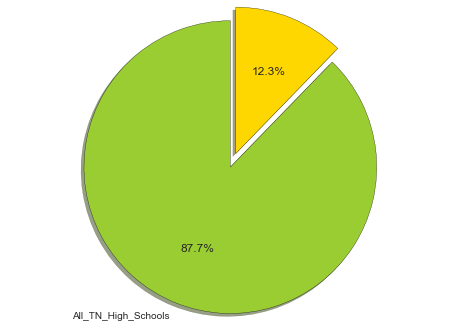

Graduation Percentage:


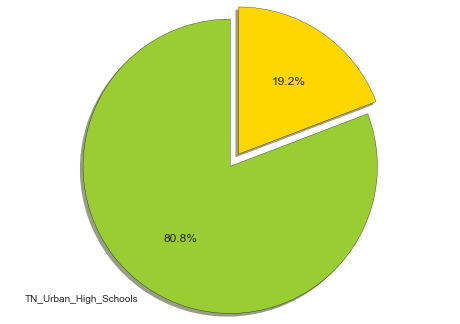

Graduation Percentage:


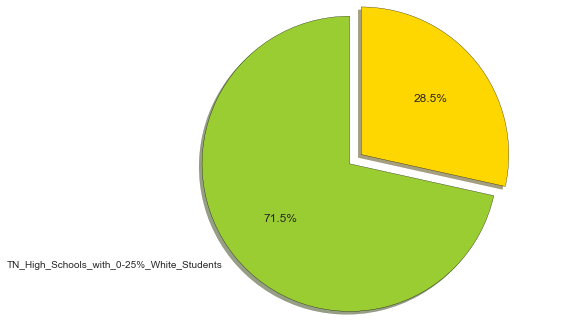

Graduation Percentage:


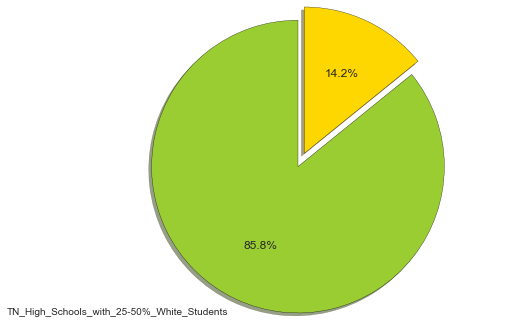

Graduation Percentage:


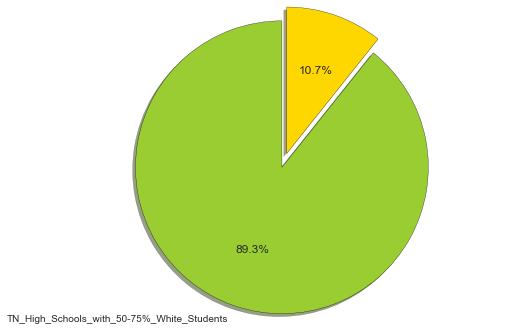

Graduation Percentage:


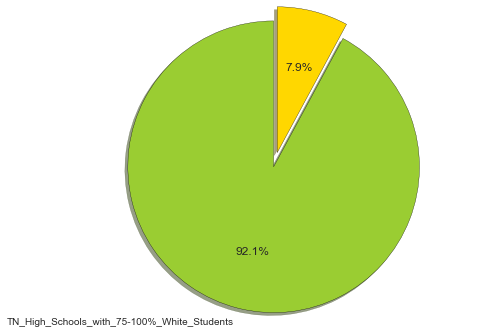

Graduation Percentage:


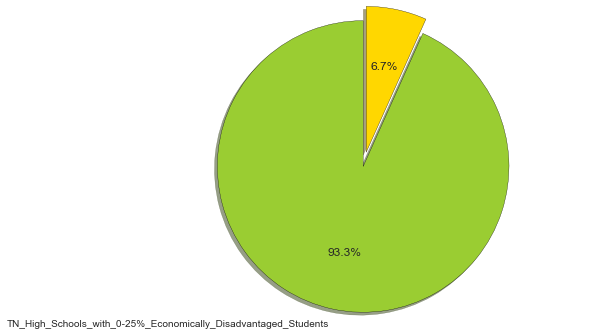

Graduation Percentage:


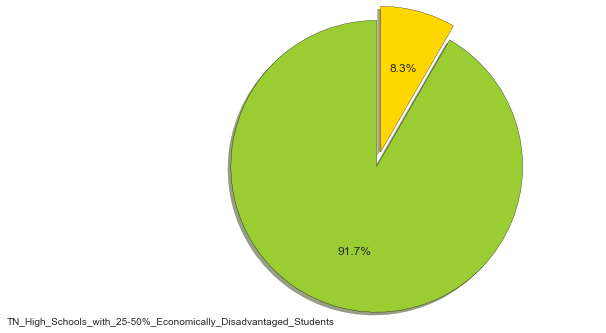

Graduation Percentage:


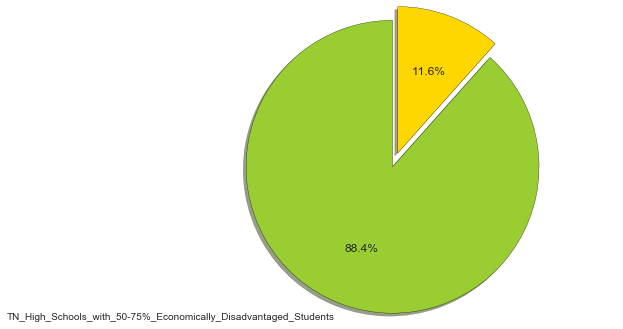

Graduation Percentage:


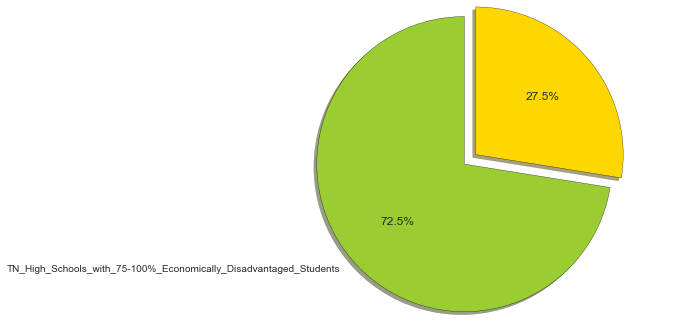

In [20]:
for i in range (0,10):
    GradPctPie(i)